In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
import sys
from sklearn.metrics import r2_score

# 数据的预处理与特征选择

In [51]:
#数据集导入
data_molecular = pd.read_excel("./Molecular_Descriptor.xlsx")
data_ER = pd.read_excel("./ERα_activity.xlsx")

In [52]:
#查看每个数据集的规模
print("data_molecular_shape:",data_molecular.shape)
print("data_ER_shape", data_ER.shape)
print("data_ADMET_shape", data_ADMET.shape)

data_molecular_shape: (1974, 730)
data_ER_shape (1974, 3)
data_ADMET_shape (1974, 6)


In [53]:
#对data_molecular和data_ER两个数据集做列合并
data_ER_X = data_ER.drop(["SMILES"], axis=1)
data_concat = pd.concat([data_molecular,data_ER_X], axis=1)
data_concat.head()

,SMILES,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,IC50_nM,pIC50
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,...,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166,2.5,8.602060
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,...,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174,7.5,8.124939
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,...,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176,3.1,8.508638
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,...,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174,3.9,8.408935
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,...,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174,7.4,8.130768


In [54]:
#查看合并数据集的规模和类型
print(data_concat.shape)
print(type(data_concat))

(1974, 732)
<class 'pandas.core.frame.DataFrame'>


In [143]:
#X和y的划分
X = data_concat.drop(['SMILES','IC50_nM','pIC50'],axis=1)
y = data_concat.loc[:, ['IC50_nM','pIC50']]

   IC50_nM     pIC50
0      2.5  8.602060
1      7.5  8.124939
2      3.1  8.508638
3      3.9  8.408935
4      7.4  8.130768
5    490.0  6.309804
6      1.0  9.000000
7     35.0  7.455932
8      4.3  8.366532
9     91.0  7.040959


In [56]:
#训练测试数据集的划分
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [144]:
y_IC50_train = y_train.loc[:,"IC50_nM"]
y_pIC50_train = y_train.loc[:,"pIC50"]
y_IC50_test = y_test.loc[:,"IC50_nM"]
y_pIC50_test = y_test.loc[:,"pIC50"]

405     6.086716
1708    8.397940
820     6.420216
781     6.327902
1658    6.004365
1201    4.927239
892     6.782516
1908    9.698970
188     5.899629
1002    4.920819
Name: pIC50, dtype: float64


In [58]:
#查看划分之后的各数据集的规模
print(X_train.shape,y_IC50_train.shape,y_pIC50_train.shape,X_test.shape,y_IC50_test.shape,y_pIC50_test.shape)

(1579, 729) (1579,) (1579,) (395, 729) (395,) (395,)


In [60]:
#通过随机森林算法来对数据集进行特征提取
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200)
rf_model.fit(X_train,y_pIC50_train)

RandomForestRegressor(n_estimators=200)

In [61]:
predict = rf_model.predict(X_train)
print("rt_train_r2score:",r2_score(y_pIC50_train,predict))
predict = rf_model.predict(X_test)
print("rt_test_r2score:",r2_score(y_pIC50_test,predict))

rt_train_r2score: 0.9599120614938498
rt_test_r2score: 0.8040485948214895


In [62]:
features = X.columns
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Features':features,'Importance':feature_importances})
features_df.sort_values('Importance',inplace=True,ascending=False)

In [247]:
#获取重要性最高的前20个特征
features_df[:20]

,Features,Importance
659,MDEC-23,0.190663
652,MLogP,0.048049
357,minHsOH,0.037542
476,maxHsOH,0.037281
56,C1SP2,0.031814
587,LipoaffinityIndex,0.027847
531,maxssO,0.023451
673,MLFER_A,0.020646
39,BCUTc-1l,0.020362
406,minsssN,0.018026


d:\virtual-environment\py3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


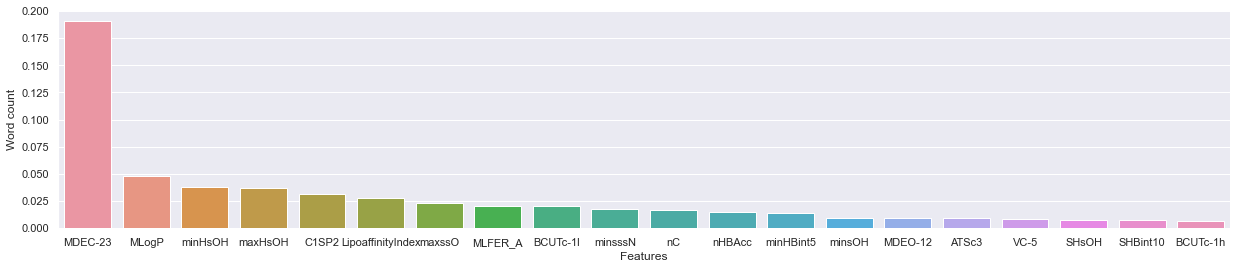

In [64]:
#对所选择的特征重要性进行可视化
sns.set(rc={"figure.figsize":(21,4)})
sns.barplot(features_df['Features'][:20],features_df['Importance'][:20])
plt.ylabel('Word count')
sns.despine(bottom=True)
plt.show()

In [190]:
#只保留X训练和测试数据集重要性最高的20个特征
X_train = X_train.loc[:,features_df[:20]["Features"]]
X_test = X_test.loc[:,features_df[:20]["Features"]]
X_train.head()


,MDEC-23,MLogP,minHsOH,maxHsOH,C1SP2,LipoaffinityIndex,maxssO,MLFER_A,BCUTc-1l,minsssN,nC,nHBAcc,minHBint5,minsOH,MDEO-12,ATSc3,VC-5,SHsOH,SHBint10,BCUTc-1h
405,15.792935,2.45,0.600997,0.631386,0,4.255948,0.000000,1.089,-0.361387,0.000000,13,0,3.104187,9.227737,0.338062,-0.044133,0.051782,1.232382,0.000000,0.233193
1708,31.930771,3.77,0.464317,0.520691,0,12.121766,5.971528,1.089,-0.361388,2.458736,27,2,0.288261,9.758549,0.174078,-0.098939,0.152463,0.985008,9.780235,0.145182
820,40.897467,4.65,0.419160,0.419160,0,13.349090,6.062373,0.546,-0.360832,2.478880,33,2,0.000000,10.223218,0.227921,-0.105410,0.195756,0.419160,0.000000,0.213431
781,17.955602,2.78,0.000000,0.000000,1,5.922496,0.000000,0.197,-0.292212,0.000000,16,3,0.000000,0.000000,0.000000,-0.089432,0.260007,0.000000,0.000000,0.180573
1658,34.845329,4.10,0.483891,0.503777,0,12.084023,5.913755,0.891,-0.421736,2.151465,28,2,0.000000,9.519566,0.200000,-0.012768,0.093227,0.987668,15.383927,0.077077


In [66]:
#对20个特征进行pca主成分分析
pca = PCA(n_components=20)
pca.fit(X_train)

PCA(n_components=20)

In [67]:
#查看各个特征的方差，并可视化
pca.explained_variance_ratio_

array([5.75958594e-01, 2.02141158e-01, 1.02203645e-01, 4.67588341e-02,
       3.03847499e-02, 2.27521681e-02, 9.17386712e-03, 4.25483850e-03,
       3.05018907e-03, 2.02727224e-03, 6.14667483e-04, 3.35522818e-04,
       1.19795950e-04, 8.74283703e-05, 6.12627354e-05, 3.15312190e-05,
       2.64961818e-05, 1.10499876e-05, 5.59322624e-06, 1.33484472e-06])

No handles with labels found to put in legend.


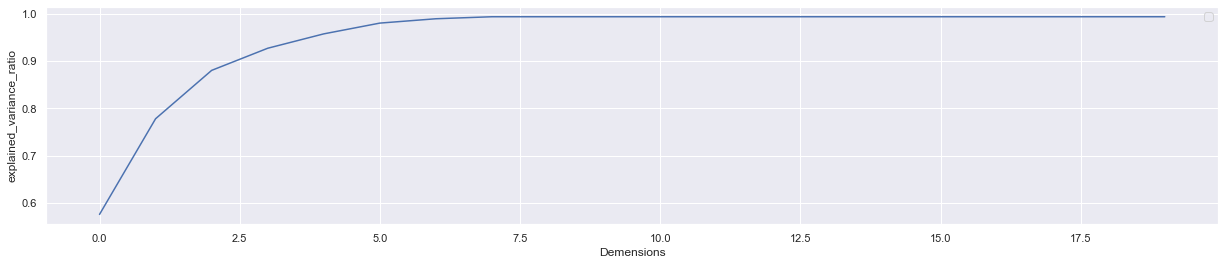

In [269]:
plt.xlabel("Demensions")
plt.ylabel("explained_variance_ratio")
plt.plot([i for i in range(X_train.shape[1])],[np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.legend()

In [70]:
#选取贡献率99%方差的特征
pca = PCA(0.99)
pca.fit(X_train)
pca.n_components_

8

In [71]:
#通过pca对训练以及测试数据集进行降维处理，维度为8
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(1579, 8)


# 构建化合物对ERα生物活性的定量预测模型

In [265]:
#数值均值方差归一化处理
# std = StandardScaler()
# std.fit(X_train_pca)
# X_train_std = std.transform(X_train_pca)
# X_test_std = std.transform(X_test_pca)
std = StandardScaler()
std.fit(X_train)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)
print(X_train_std.shape)

(1579, 20)


In [290]:
#①建立SVM模型并对模型的R2值进行评估
from sklearn.svm import SVR
svr = SVR(tol=1e-5, kernel='rbf',C=1e1)
svr.fit(X_train_std,y_pIC50_train)

SVR(C=10.0, tol=1e-05)

In [302]:
print("SVR_train_data的r2值为：",svr.score(X_train_std, y_pIC50_train))
print("SVR_test_data的r2值为：",svr.score(X_test_std, y_pIC50_test))
SVR_train_data_r2score = svr.score(X_train_std, y_pIC50_train)
SVR_test_data_r2score = svr.score(X_test_std, y_pIC50_test)

SVR_train_data的r2值为： 0.843699380688474
SVR_test_data的r2值为： 0.7604722405593699


In [75]:
#②建立决策树模型并对模型的R2值进行评估
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV
# param_grid = [
#     {
#         "criterion": ["squared_error","absolute_error","mae"],
#         "max_depth": [10,20,30,40,50,100],
#         'min_samples_leaf': [1,2,3,5,7,10],
#         'min_impurity_decrease': [0.1,0.2,0.3]
#     }
# ]
# dtr = DecisionTreeRegressor()
# dtr_grid = GridSearchCV(dtr, param_grid, n_jobs=-1, verbose=1)
# dtr_grid.fit(X_train,y_pIC50_train)

In [76]:
# print("最优超参数为：",dtr_grid.best_params_)
# print("train_data的r2值为：",dtr_grid.best_estimator_.score(X_train, y_pIC50_train))
# print("test_data的r2值为：",dtr_grid.best_estimator_.score(X_test, y_pIC50_test))

In [293]:
#②建立KNN模型并对模型的R2值进行评估
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1, 11)]
    },
    {
        "weights": ["distance"],
        "n_neighbors": [i for i in range(1, 11)],
        "p": [i for i in range(1,6)]
    }
]
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, n_jobs=-1, verbose=1)
#数值归一化处理
# std = StandardScaler()
# std.fit(X_train_pca)
# X_train_pca_std = std.transform(X_train_pca)
# X_test_pca_std = std.transform(X_test_pca)
grid_search.fit(X_train_std, y_pIC50_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=1)

In [303]:
print("最优超参数为：",grid_search.best_params_)
print("KNN_train_data的r2值为：",grid_search.best_estimator_.score(X_train_std, y_pIC50_train))
print("KNN_test_data的r2值为：",grid_search.best_estimator_.score(X_test_std, y_pIC50_test))
KNN_train_data_r2score = grid_search.best_estimator_.score(X_train_std, y_pIC50_train)
KNN_test_data_r2score = grid_search.best_estimator_.score(X_test_std, y_pIC50_test)

最优超参数为： {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
KNN_train_data的r2值为： 0.9925106611137752
KNN_test_data的r2值为： 0.7688844357953251


In [300]:
#③建立随机森林模型并对模型的R2值进行评估
param_grid_rf = [
    {
        "max_depth": [30,40,50],
        'min_samples_leaf': [1,2,3],
        'n_estimators': [300,400,500],
    }
]
rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, param_grid_rf, n_jobs=-1, verbose=1)
rf_grid.fit(X_train,y_pIC50_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [30, 40, 50],
                          'min_samples_leaf': [1, 2, 3],
                          'n_estimators': [300, 400, 500]}],
             verbose=1)

In [304]:
print("最优超参数为：",rf_grid.best_params_)
print("RandomForest_train_r2score:",rf_grid.best_estimator_.score(X_train,y_pIC50_train))
print("RandomForest_test_r2score:",rf_grid.best_estimator_.score(X_test,y_pIC50_test))
RandomForest_train_r2score = rf_grid.best_estimator_.score(X_train,y_pIC50_train)
RandomForest_test_r2score = rf_grid.best_estimator_.score(X_test,y_pIC50_test)

最优超参数为： {'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 300}
RandomForest_train_r2score: 0.9397237289301599
RandomForest_test_r2score: 0.7882578702801329


# 模型选择，数据预测以及填充

In [81]:
#导入要预测的数据集
origin_molecular = pd.read_excel("./Molecular_Descriptor.xlsx",sheet_name='test')
origin_ER = pd.read_excel("./ERα_activity.xlsx",sheet_name='test')
print(origin_molecular.shape)
print(origin_ER.shape)

(50, 730)
(50, 3)


In [82]:
#测试集的特征选择
X_final = origin_molecular.drop(['SMILES'],axis=1)
X_final = X_final.loc[:,features_df[:20]["Features"]]
print(X_final.shape)
X_final.head()

(50, 20)


,MDEC-23,MLogP,minHsOH,maxHsOH,C1SP2,LipoaffinityIndex,maxssO,MLFER_A,BCUTc-1l,minsssN,nC,nHBAcc,minHBint5,minsOH,MDEO-12,ATSc3,VC-5,SHsOH,SHBint10,BCUTc-1h
0,44.466435,4.21,0.505216,0.514285,0,10.371184,6.281369,1.089,-0.363905,0.0,34,3,0.0,9.793792,1.867188,0.060045,0.208358,1.019501,17.09696,0.278515
1,37.917748,3.77,0.534678,0.700035,1,9.079538,5.996806,1.134,-0.360551,0.0,25,2,0.0,8.828071,0.303270,-0.022876,0.107446,1.234713,0.00000,0.283440
2,39.275746,3.77,0.528761,0.695591,1,9.155849,6.059306,1.134,-0.360612,0.0,26,2,0.0,8.860576,0.544033,-0.025475,0.107446,1.224351,0.00000,0.283450
3,39.275746,3.66,0.538150,0.702586,1,9.398003,5.837639,1.134,-0.360554,0.0,25,2,0.0,8.819839,0.303270,-0.032505,0.107446,1.240736,0.00000,0.283448
4,39.275746,3.66,0.523975,0.694613,1,9.762358,0.000000,1.134,-0.360509,0.0,25,2,0.0,8.839644,0.000000,-0.016199,0.141466,1.218588,0.00000,0.283445


In [178]:
#调用训练好的随机森林模型对数据集进行预测
y_final_pIC50 = rf_grid.predict(X_final)
origin_ER.loc[:,["pIC50"]] = y_final_pIC50
y_final_IC50 = np.power(10,-y_final_pIC50)/(10**-9)
origin_ER.loc[:,["IC50_nM"]] = y_final_IC50
print(type(origin_ER))
print(origin_ER)
origin_ER.to_excel("ERα_activity_predict.xlsx",index=False)

<class 'pandas.core.frame.DataFrame'>
                                               SMILES      IC50_nM     pIC50
0   COc1cc(OC)cc(\C=C\c2ccc(OS(=O)(=O)[C@@H]3C[C@@...    17.449263  7.758223
1   OC(=O)\C=C\c1ccc(cc1)C2=C(CCOc3ccccc23)c4ccc(O...    15.334541  7.814329
2   COc1ccc2C(=C(CCOc2c1)c3ccc(O)cc3)c4ccc(\C=C\C(...    13.201059  7.879391
3   OC(=O)\C=C\c1ccc(cc1)C2=C(CCOc3cc(F)ccc23)c4cc...    13.123334  7.881956
4   OC(=O)\C=C\c1ccc(cc1)C2=C(CCSc3cc(F)ccc23)c4cc...    20.096325  7.696883
5   CC(=O)\C=C\c1ccc(cc1)C2=C(CCOc3cc(F)ccc23)c4cc...    23.833512  7.622812
6   Oc1ccc(cc1)C2=C(c3ccc(\C=C\c4ccccc4)cc3)c5ccc(...    11.833977  7.926869
7   Oc1ccc(cc1)C2=C(c3ccc(\C=C\C(=O)c4ccccc4)cc3)c...     9.086961  8.041581
8   OC(=O)\C=C\C=C\c1ccc(cc1)C2=C(CCOc3cc(F)ccc23)...    32.954905  7.482080
9   CCN(CC)C(=O)\C=C\c1ccc(cc1)C2=C(CCOc3cc(F)ccc2...    29.598766  7.528726
10  Oc1ccc(cc1)C2=C(c3ccc(\C=C\C(=O)N4CCCC4)cc3)c5...    19.879594  7.701592
11  CCN(CC)CCNC(=O)\C=C\c1ccc(cc1)C2=C

In [174]:
# from sklearn.metrics import mean_squared_error
# y_IC50_train = y_train.loc[:,"IC50_nM"]
# y_pIC50_train = y_train.loc[:,"pIC50"]
# Y = -np.log10(X*(10**-9))
# y_IC50_predict = np.power(10,-y_pIC50_train)/(10**-9)
# mse = mean_squared_error(y_IC50_train,y_IC50_predict)
# print(mse)

8.400028168564168e-19


# 构建化合物的Caco-2、CYP3A4、hERG、HOB、MN的分类预测模型

In [5]:
#数据导入与预处理
#X和y的划分
data_ADMET = pd.read_excel("./ADMET.xlsx")
X = pd.read_excel("./Molecular_Descriptor.xlsx")
X = X.drop(["SMILES"], axis=1)
y = data_ADMET.drop(["SMILES"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)                                                 

In [6]:
#对数据集做均值方差归一化处理
std = StandardScaler()
std.fit(X_train)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)

In [7]:
y_Caco_2_train = y_train.loc[:,"Caco-2"] 
y_CYP3A4_train = y_train.loc[:,"CYP3A4"] 
y_hERG_train = y_train.loc[:,"hERG"] 
y_HOB_train = y_train.loc[:,"HOB"] 
y_MN_train = y_train.loc[:,"MN"]

y_Caco_2_test = y_test.loc[:,"Caco-2"] 
y_CYP3A4_test = y_test.loc[:,"CYP3A4"] 
y_hERG_test = y_test.loc[:,"hERG"] 
y_HOB_test = y_test.loc[:,"HOB"] 
y_MN_test = y_test.loc[:,"MN"]  

In [20]:
#建立神经网络模型训练数据
from keras.models import Sequential
from keras.layers import Dense,Activation
mlp_1 = Sequential()
mlp_1.add(Dense(units=365,activation="relu", input_dim=729))
mlp_1.add(Dense(units=365,activation="softmax"))
mlp_1.add(Dense(units=1,activation="sigmoid"))
mlp_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 365)               266450    
_________________________________________________________________
dense_4 (Dense)              (None, 365)               133590    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 366       
Total params: 400,406
Trainable params: 400,406
Non-trainable params: 0
_________________________________________________________________


In [21]:
mlp_1.compile(optimizer='adam',loss='binary_crossentropy')

In [22]:
#对Caco-2进行训练并预测
mlp_1.fit(X_train_std,y_Caco_2_train,epochs=400)

Epoch 1/400
50/50 [==============================] - 1s 5ms/step - loss: 0.6542
Epoch 2/400
50/50 [==============================] - 0s 5ms/step - loss: 0.6133
Epoch 3/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5844
Epoch 4/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5611
Epoch 5/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5407
Epoch 6/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5231
Epoch 7/400
50/50 [==============================] - 0s 4ms/step - loss: 0.5061
Epoch 8/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4861
Epoch 9/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4734
Epoch 10/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4569
Epoch 11/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4421
Epoch 12/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4262
Epoch 13/400
50/50 [=================

50/50 [==============================] - 0s 4ms/step - loss: 0.1260
Epoch 102/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1228
Epoch 103/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1423
Epoch 104/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1311
Epoch 105/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1361
Epoch 106/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1222
Epoch 107/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1230
Epoch 108/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1276
Epoch 109/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1239
Epoch 110/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1238
Epoch 111/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1171
Epoch 112/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1173
Epoch 113/400
50/50 [=========

50/50 [==============================] - 0s 4ms/step - loss: 0.1245
Epoch 201/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1184
Epoch 202/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1227
Epoch 203/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1109
Epoch 204/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1102
Epoch 205/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1121
Epoch 206/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1096
Epoch 207/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1139
Epoch 208/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1108
Epoch 209/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1100
Epoch 210/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1098
Epoch 211/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1097
Epoch 212/400
50/50 [=========

50/50 [==============================] - 0s 5ms/step - loss: 0.1293
Epoch 300/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1409
Epoch 301/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1293
Epoch 302/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1383
Epoch 303/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1256
Epoch 304/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1180
Epoch 305/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1199
Epoch 306/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1198
Epoch 307/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1198
Epoch 308/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1198
Epoch 309/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1198
Epoch 310/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1197
Epoch 311/400
50/50 [=========

50/50 [==============================] - 0s 4ms/step - loss: 0.1133
Epoch 399/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1133
Epoch 400/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1133


In [24]:
from sklearn.metrics import accuracy_score
y_Caco_2_test_predict = mlp_1.predict(X_test_std)
for i in range(y_Caco_2_test_predict.shape[0]):
    if y_Caco_2_test_predict[i,:]>0.5:
        y_Caco_2_test_predict[i,:]=1
    else:
        y_Caco_2_test_predict[i,:]=0
y_Caco_2_test_predict = np.array(y_Caco_2_test_predict,dtype=int)
Caco_2_accuracy = accuracy_score(y_Caco_2_test,y_Caco_2_test_predict)
print("Caco_2_accuracy:",Caco_2_accuracy)

Caco_2_accuracy: 0.9215189873417722


In [25]:
#对CYP3A4进行训练并预测
mlp_2 = Sequential()
mlp_2.add(Dense(units=365,activation="relu", input_dim=729))
mlp_2.add(Dense(units=365,activation="softmax"))
mlp_2.add(Dense(units=1,activation="sigmoid"))
mlp_2.compile(optimizer='adam',loss='binary_crossentropy')
mlp_2.fit(X_train_std,y_CYP3A4_train,epochs=400)

Epoch 1/400
50/50 [==============================] - 1s 5ms/step - loss: 0.6437
Epoch 2/400
50/50 [==============================] - 0s 6ms/step - loss: 0.5966
Epoch 3/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5613
Epoch 4/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5315
Epoch 5/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5049
Epoch 6/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4805
Epoch 7/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4594
Epoch 8/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4408
Epoch 9/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4216
Epoch 10/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4042
Epoch 11/400
50/50 [==============================] - 0s 5ms/step - loss: 0.3882
Epoch 12/400
50/50 [==============================] - 0s 5ms/step - loss: 0.3773
Epoch 13/400
50/50 [=================

50/50 [==============================] - 0s 5ms/step - loss: 0.0809
Epoch 101/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0799
Epoch 102/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0770A: 0s - loss: 0.0
Epoch 103/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0783
Epoch 104/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0755
Epoch 105/400
50/50 [==============================] - 0s 5ms/step - loss: 0.0725
Epoch 106/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0720
Epoch 107/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0717
Epoch 108/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0715
Epoch 109/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0709
Epoch 110/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0705
Epoch 111/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0702
Epoch 112/400

50/50 [==============================] - 0s 4ms/step - loss: 0.0828
Epoch 200/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0885
Epoch 201/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0777
Epoch 202/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0717
Epoch 203/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0947
Epoch 204/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0795
Epoch 205/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0834
Epoch 206/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0691
Epoch 207/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0710
Epoch 208/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0997
Epoch 209/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0776
Epoch 210/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0952
Epoch 211/400
50/50 [=========

50/50 [==============================] - 0s 5ms/step - loss: 0.0631
Epoch 299/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0631
Epoch 300/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0628
Epoch 301/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0607
Epoch 302/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0604
Epoch 303/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0604
Epoch 304/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0603
Epoch 305/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0602
Epoch 306/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0602
Epoch 307/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0602
Epoch 308/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0601
Epoch 309/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0601
Epoch 310/400
50/50 [=========

50/50 [==============================] - 0s 4ms/step - loss: 0.0669
Epoch 398/400
50/50 [==============================] - 0s 5ms/step - loss: 0.0669
Epoch 399/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0669
Epoch 400/400
50/50 [==============================] - 0s 4ms/step - loss: 0.0668


In [26]:
y_CYP3A4_test_predict = mlp_2.predict(X_test_std)
for i in range(y_CYP3A4_test_predict.shape[0]):
    if y_CYP3A4_test_predict[i,:]>0.5:
        y_CYP3A4_test_predict[i,:]=1
    else:
        y_CYP3A4_test_predict[i,:]=0
y_CYP3A4_test_predict = np.array(y_CYP3A4_test_predict,dtype=int)
CYP3A4_accuracy = accuracy_score(y_CYP3A4_test,y_CYP3A4_test_predict)
print("CYP3A4_accuracy:",CYP3A4_accuracy)

CYP3A4_accuracy: 0.9443037974683545


In [29]:
#对hERG进行训练并预测
mlp_3 = Sequential()
mlp_3.add(Dense(units=365,activation="relu", input_dim=729))
mlp_3.add(Dense(units=365,activation="softmax"))
mlp_3.add(Dense(units=1,activation="sigmoid"))
mlp_3.compile(optimizer='adam',loss='binary_crossentropy')
mlp_3.fit(X_train_std,y_hERG_train,epochs=400)

Epoch 1/400
50/50 [==============================] - 1s 4ms/step - loss: 0.6535
Epoch 2/400
50/50 [==============================] - 0s 5ms/step - loss: 0.6224
Epoch 3/400
50/50 [==============================] - 0s 5ms/step - loss: 0.6017
Epoch 4/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5835
Epoch 5/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5651
Epoch 6/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5480
Epoch 7/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5285
Epoch 8/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5162
Epoch 9/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5051
Epoch 10/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4881
Epoch 11/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4768
Epoch 12/400
50/50 [==============================] - 0s 6ms/step - loss: 0.4575
Epoch 13/400
50/50 [=================

50/50 [==============================] - 0s 5ms/step - loss: 0.1599
Epoch 102/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1501
Epoch 103/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1714
Epoch 104/400
50/50 [==============================] - 0s 6ms/step - loss: 0.1517
Epoch 105/400
50/50 [==============================] - 0s 6ms/step - loss: 0.1465
Epoch 106/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1515
Epoch 107/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1573
Epoch 108/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1577
Epoch 109/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1677
Epoch 110/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1689
Epoch 111/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1616
Epoch 112/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1587
Epoch 113/400
50/50 [=========

50/50 [==============================] - 0s 4ms/step - loss: 0.1451
Epoch 201/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1404
Epoch 202/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1409
Epoch 203/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1371
Epoch 204/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1351
Epoch 205/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1327
Epoch 206/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1335
Epoch 207/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1596
Epoch 208/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1419
Epoch 209/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1336
Epoch 210/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1314
Epoch 211/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1279
Epoch 212/400
50/50 [=========

50/50 [==============================] - 0s 4ms/step - loss: 0.1171
Epoch 301/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1180
Epoch 302/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1190
Epoch 303/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1163
Epoch 304/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1162
Epoch 305/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1161
Epoch 306/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1161
Epoch 307/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1161
Epoch 308/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1160
Epoch 309/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1159
Epoch 310/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1159
Epoch 311/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1156
Epoch 312/400
50/50 [=========

50/50 [==============================] - 0s 4ms/step - loss: 0.1238
Epoch 399/400
50/50 [==============================] - 0s 6ms/step - loss: 0.1156
Epoch 400/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1150


In [30]:
y_hERG_test_predict = mlp_3.predict(X_test_std)
for i in range(y_hERG_test_predict.shape[0]):
    if y_hERG_test_predict[i,:]>0.5:
        y_hERG_test_predict[i,:]=1
    else:
        y_hERG_test_predict[i,:]=0
y_hERG_test_predict = np.array(y_hERG_test_predict,dtype=int)
hERG_accuracy = accuracy_score(y_hERG_test,y_hERG_test_predict)
print("hERG_accuracy:",hERG_accuracy)

hERG_accuracy: 0.8810126582278481


In [31]:
#对HOB进行训练并预测
mlp_4 = Sequential()
mlp_4.add(Dense(units=365,activation="relu", input_dim=729))
mlp_4.add(Dense(units=365,activation="softmax"))
mlp_4.add(Dense(units=1,activation="sigmoid"))
mlp_4.compile(optimizer='adam',loss='binary_crossentropy')
mlp_4.fit(X_train_std,y_HOB_train,epochs=400)

Epoch 1/400
50/50 [==============================] - 1s 5ms/step - loss: 0.6561
Epoch 2/400
50/50 [==============================] - 0s 5ms/step - loss: 0.6175
Epoch 3/400
50/50 [==============================] - 0s 6ms/step - loss: 0.5899
Epoch 4/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5684
Epoch 5/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5458
Epoch 6/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5239
Epoch 7/400
50/50 [==============================] - 0s 5ms/step - loss: 0.5031
Epoch 8/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4877
Epoch 9/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4696
Epoch 10/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4553
Epoch 11/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4401
Epoch 12/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4271
Epoch 13/400
50/50 [=================

50/50 [==============================] - 0s 5ms/step - loss: 0.1918
Epoch 102/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1939
Epoch 103/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1926
Epoch 104/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1894
Epoch 105/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1934
Epoch 106/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1968
Epoch 107/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1895
Epoch 108/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1922
Epoch 109/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1886
Epoch 110/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1856
Epoch 111/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1871
Epoch 112/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1864
Epoch 113/400
50/50 [=========

50/50 [==============================] - 0s 5ms/step - loss: 0.1780
Epoch 201/400
50/50 [==============================] - 0s 6ms/step - loss: 0.1796
Epoch 202/400
50/50 [==============================] - 0s 6ms/step - loss: 0.1814
Epoch 203/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1909
Epoch 204/400
50/50 [==============================] - 0s 4ms/step - loss: 0.2028
Epoch 205/400
50/50 [==============================] - 0s 5ms/step - loss: 0.2069
Epoch 206/400
50/50 [==============================] - 0s 4ms/step - loss: 0.2075
Epoch 207/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1966
Epoch 208/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1906
Epoch 209/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1885
Epoch 210/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1995
Epoch 211/400
50/50 [==============================] - 0s 5ms/step - loss: 0.2088
Epoch 212/400
50/50 [=========

50/50 [==============================] - 0s 5ms/step - loss: 0.2509
Epoch 300/400
50/50 [==============================] - 0s 5ms/step - loss: 0.2240
Epoch 301/400
50/50 [==============================] - 0s 5ms/step - loss: 0.2050
Epoch 302/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1947
Epoch 303/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1934
Epoch 304/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1872
Epoch 305/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1872
Epoch 306/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1871
Epoch 307/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1870
Epoch 308/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1881
Epoch 309/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1880
Epoch 310/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1877
Epoch 311/400
50/50 [=========

50/50 [==============================] - 0s 4ms/step - loss: 0.2023
Epoch 399/400
50/50 [==============================] - 0s 4ms/step - loss: 0.2055
Epoch 400/400
50/50 [==============================] - 0s 4ms/step - loss: 0.2010


In [32]:
y_HOB_test_predict = mlp_4.predict(X_test_std)
for i in range(y_HOB_test_predict.shape[0]):
    if y_HOB_test_predict[i,:]>0.5:
        y_HOB_test_predict[i,:]=1
    else:
        y_HOB_test_predict[i,:]=0
y_HOB_test_predict = np.array(y_HOB_test_predict,dtype=int)
HOB_accuracy = accuracy_score(y_HOB_test,y_HOB_test_predict)
print("HOB_accuracy:",HOB_accuracy)

HOB_accuracy: 0.8177215189873418


In [33]:
#对MN进行训练并预测
mlp_5 = Sequential()
mlp_5.add(Dense(units=365,activation="relu", input_dim=729))
mlp_5.add(Dense(units=365,activation="softmax"))
mlp_5.add(Dense(units=1,activation="sigmoid"))
mlp_5.compile(optimizer='adam',loss='binary_crossentropy')
mlp_5.fit(X_train_std,y_MN_train,epochs=400)

Epoch 1/400
50/50 [==============================] - 1s 4ms/step - loss: 0.6469
Epoch 2/400
50/50 [==============================] - 0s 5ms/step - loss: 0.6037
Epoch 3/400
50/50 [==============================] - ETA: 0s - loss: 0.571 - 0s 5ms/step - loss: 0.5711
Epoch 4/400
50/50 [==============================] - 0s 6ms/step - loss: 0.5414
Epoch 5/400
50/50 [==============================] - 0s 6ms/step - loss: 0.5158
Epoch 6/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4927
Epoch 7/400
50/50 [==============================] - 0s 4ms/step - loss: 0.4786
Epoch 8/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4613
Epoch 9/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4354
Epoch 10/400
50/50 [==============================] - 0s 5ms/step - loss: 0.4142
Epoch 11/400
50/50 [==============================] - 0s 5ms/step - loss: 0.3983
Epoch 12/400
50/50 [==============================] - 0s 6ms/step - loss: 0.3735
Epoch 13/400


50/50 [==============================] - 0s 4ms/step - loss: 0.1339
Epoch 101/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1328
Epoch 102/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1324
Epoch 103/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1321
Epoch 104/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1324
Epoch 105/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1309
Epoch 106/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1308
Epoch 107/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1306
Epoch 108/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1300
Epoch 109/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1294
Epoch 110/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1292
Epoch 111/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1294
Epoch 112/400
50/50 [=========

50/50 [==============================] - 0s 4ms/step - loss: 0.1258
Epoch 200/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1258
Epoch 201/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1258
Epoch 202/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1258
Epoch 203/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1258
Epoch 204/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1258
Epoch 205/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1257
Epoch 206/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1284
Epoch 207/400
50/50 [==============================] - 0s 4ms/step - loss: 0.2339
Epoch 208/400
50/50 [==============================] - 0s 4ms/step - loss: 0.3053
Epoch 209/400
50/50 [==============================] - 0s 4ms/step - loss: 0.2091
Epoch 210/400
50/50 [==============================] - 0s 4ms/step - loss: 0.2142
Epoch 211/400
50/50 [=========

50/50 [==============================] - 0s 4ms/step - loss: 0.1398
Epoch 300/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1398
Epoch 301/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1398
Epoch 302/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1398
Epoch 303/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1398
Epoch 304/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1397
Epoch 305/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1397
Epoch 306/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1397
Epoch 307/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1397
Epoch 308/400
50/50 [==============================] - 0s 5ms/step - loss: 0.1397
Epoch 309/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1397
Epoch 310/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1397
Epoch 311/400
50/50 [=========

50/50 [==============================] - 0s 5ms/step - loss: 0.1172
Epoch 399/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1172
Epoch 400/400
50/50 [==============================] - 0s 4ms/step - loss: 0.1172


In [34]:
y_MN_test_predict = mlp_5.predict(X_test_std)
for i in range(y_MN_test_predict.shape[0]):
    if y_MN_test_predict[i,:]>0.5:
        y_MN_test_predict[i,:]=1
    else:
        y_MN_test_predict[i,:]=0
y_MN_test_predict = np.array(y_MN_test_predict,dtype=int)
MN_accuracy = accuracy_score(y_MN_test,y_MN_test_predict)
print("MN_accuracy:",MN_accuracy)

MN_accuracy: 0.9518987341772152


In [ ]:
#对excel的五项指标值进行预测并填充

In [35]:
#预测数据集导入
data_ADMET_test = pd.read_excel("./ADMET.xlsx",sheet_name="test")
origin_molecular = pd.read_excel("./Molecular_Descriptor.xlsx",sheet_name='test')
X_final = origin_molecular.drop(['SMILES'],axis=1)

In [36]:
#对预测值做均值方差归一化
std = StandardScaler()
std.fit(X_final)
X_final_std = std.transform(X_final)

In [43]:
#预测Caco_2指标并填入excel表
Caco_2_predict = mlp_1.predict(X_final_std)
for i in range(Caco_2_predict.shape[0]):
    if Caco_2_predict[i,:]>0.5:
        Caco_2_predict[i,:]=1
    else:
        Caco_2_predict[i,:]=0
Caco_2_predict = np.array(Caco_2_predict,dtype=int)
data_ADMET_test.loc[:,["Caco-2"]] = Caco_2_predict

In [44]:
#预测CYP3A4指标并填入excel表
CYP3A4_predict = mlp_2.predict(X_final_std)
for i in range(CYP3A4_predict.shape[0]):
    if CYP3A4_predict[i,:]>0.5:
        CYP3A4_predict[i,:]=1
    else:
        CYP3A4_predict[i,:]=0
CYP3A4_predict = np.array(CYP3A4_predict,dtype=int)
data_ADMET_test.loc[:,["CYP3A4"]] = CYP3A4_predict

In [45]:
#预测hERG指标并填入excel表
hERG_predict = mlp_3.predict(X_final_std)
for i in range(hERG_predict.shape[0]):
    if hERG_predict[i,:]>0.5:
        hERG_predict[i,:]=1
    else:
        hERG_predict[i,:]=0
hERG_predict = np.array(hERG_predict,dtype=int)
data_ADMET_test.loc[:,["hERG"]] = hERG_predict

In [46]:
#预测HOB指标并填入excel表
HOB_predict = mlp_4.predict(X_final_std)
for i in range(HOB_predict.shape[0]):
    if HOB_predict[i,:]>0.5:
        HOB_predict[i,:]=1
    else:
        HOB_predict[i,:]=0
HOB_predict = np.array(HOB_predict,dtype=int)
data_ADMET_test.loc[:,["HOB"]] = HOB_predict

In [47]:
#预测MN指标并填入excel表
MN_predict = mlp_5.predict(X_final_std)
for i in range(MN_predict.shape[0]):
    if MN_predict[i,:]>0.5:
        MN_predict[i,:]=1
    else:
        MN_predict[i,:]=0
MN_predict = np.array(MN_predict,dtype=int)
data_ADMET_test.loc[:,["MN"]] = MN_predict

In [48]:
data_ADMET_test

,SMILES,Caco-2,CYP3A4,hERG,HOB,MN
0,COc1cc(OC)cc(\C=C\c2ccc(OS(=O)(=O)[C@@H]3C[C@@...,0,1,1,0,1
1,OC(=O)\C=C\c1ccc(cc1)C2=C(CCOc3ccccc23)c4ccc(O...,0,0,0,0,1
2,COc1ccc2C(=C(CCOc2c1)c3ccc(O)cc3)c4ccc(\C=C\C(...,0,0,0,0,1
3,OC(=O)\C=C\c1ccc(cc1)C2=C(CCOc3cc(F)ccc23)c4cc...,0,0,0,0,1
4,OC(=O)\C=C\c1ccc(cc1)C2=C(CCSc3cc(F)ccc23)c4cc...,0,0,0,0,1
5,CC(=O)\C=C\c1ccc(cc1)C2=C(CCOc3cc(F)ccc23)c4cc...,1,0,0,0,0
6,Oc1ccc(cc1)C2=C(c3ccc(\C=C\c4ccccc4)cc3)c5ccc(...,0,0,0,0,0
7,Oc1ccc(cc1)C2=C(c3ccc(\C=C\C(=O)c4ccccc4)cc3)c...,0,0,0,0,1
8,OC(=O)\C=C\C=C\c1ccc(cc1)C2=C(CCOc3cc(F)ccc23)...,0,0,0,0,1
9,CCN(CC)C(=O)\C=C\c1ccc(cc1)C2=C(CCOc3cc(F)ccc2...,1,1,1,0,1


In [179]:
data_ADMET_test.to_excel("ADMET_predict.xlsx",index=False)

# 寻找使化合物对抑制ERα具有更好的生物活性，同时具有更好的ADMET性质的分子描述符的取值范围

In [180]:
#筛选出ADMET中五项指标其中有三项指标值为1的样本

In [324]:
ADMET_data = pd.read_excel("ADMET.xlsx").drop(["SMILES"],axis=1)
ER_data = pd.read_excel("ERα_activity.xlsx").drop(["SMILES","IC50_nM"],axis=1)
ADMET_data.loc[:,["hERG","MN"]] = ADMET_data.loc[:,["hERG","MN"]].replace({0:1, 1:0})
comprehensive_value = []
for i in range(ADMET_data.shape[0]):
    if ADMET_data.loc[:,"Caco-2"][i]+ADMET_data.loc[:,"CYP3A4"][i]+ADMET_data.loc[:,"hERG"][i]+ADMET_data.loc[:,"HOB"][i]+ADMET_data.loc[:,"MN"][i]>2:
        comprehensive_value.append(1)
    else:
        comprehensive_value.append(0)


In [325]:
# comprehensive_value = np.array(comprehensive_value).ravel()
ADMET_data["comprehensive_value"]=comprehensive_value
ADMET_data = ADMET_data.loc[:,"comprehensive_value"]
Molecular_data = pd.read_excel("Molecular_Descriptor.xlsx").loc[:,features_df[:20]["Features"]]
Data_Comprehensive = pd.concat([ADMET_data,Molecular_data,ER_data],axis=1)
Data_Comprehensive.head()

,comprehensive_value,MDEC-23,MLogP,minHsOH,maxHsOH,C1SP2,LipoaffinityIndex,maxssO,MLFER_A,BCUTc-1l,...,nHBAcc,minHBint5,minsOH,MDEO-12,ATSc3,VC-5,SHsOH,SHBint10,BCUTc-1h,pIC50
0,0,28.277932,3.77,0.469126,0.469126,0,11.830949,6.593009,0.546,-0.360525,...,1,3.092949,9.968948,0.269680,-0.126453,0.230311,0.469126,0.000000,0.185437,8.602060
1,0,31.076748,3.99,0.449126,0.449126,0,13.149974,6.674642,0.546,-0.360530,...,1,2.997752,10.058948,0.269680,-0.126453,0.230311,0.449126,0.000000,0.185459,8.124939
2,0,30.901064,3.77,0.480713,0.516534,0,10.577177,6.502751,1.089,-0.361379,...,1,3.125957,9.752886,0.495846,-0.143126,0.174055,0.997247,9.842059,0.116954,8.508638
3,0,30.570001,3.99,0.456486,0.456486,0,13.212767,6.622142,0.546,-0.360530,...,1,3.022916,10.025028,0.269680,-0.126504,0.123273,0.456486,0.000000,0.185459,8.408935
4,0,30.570001,3.99,0.473631,0.473631,0,12.489691,6.552810,0.546,-0.360530,...,1,3.103616,9.993342,0.269680,-0.128690,0.123273,0.473631,0.000000,0.185459,8.130768


In [326]:
from collections import Counter
Counter(Data_Comprehensive.loc[:,"comprehensive_value"])

Counter({0: 1342, 1: 632})

In [327]:
Data_Comprehensive = Data_Comprehensive[Data_Comprehensive["comprehensive_value"]==1]
Data_Comprehensive = Data_Comprehensive.drop(["comprehensive_value"],axis=1)

In [328]:
X = Data_Comprehensive.drop(["pIC50"],axis=1)
y = Data_Comprehensive.loc[:,"pIC50"]
print(X.shape,y.shape)
X.head()

(632, 20) (632,)


,MDEC-23,MLogP,minHsOH,maxHsOH,C1SP2,LipoaffinityIndex,maxssO,MLFER_A,BCUTc-1l,minsssN,nC,nHBAcc,minHBint5,minsOH,MDEO-12,ATSc3,VC-5,SHsOH,SHBint10,BCUTc-1h
8,33.308238,3.77,0.480938,0.531414,0,9.243204,0.000000,1.089,-0.361389,0.000000,23,0,0.000000,9.655749,0.00000,-0.026364,0.264010,1.012352,9.921873,0.110841
9,34.111772,3.55,0.498954,0.545400,0,6.100094,0.000000,1.089,-0.361670,0.000000,23,2,0.000000,9.625850,0.00000,-0.071584,0.283208,1.044354,10.199067,0.187353
11,33.197541,3.77,0.473132,0.480938,0,9.178489,0.000000,1.089,-0.361379,0.000000,23,0,0.000000,9.932875,0.00000,-0.026890,0.264010,0.954069,0.000000,0.110844
12,18.619141,3.66,0.478192,0.478192,0,11.653881,6.507107,0.546,-0.360523,2.503969,25,1,3.111646,9.906413,0.26968,-0.126400,0.718386,0.478192,0.000000,0.185425
15,22.698694,3.66,0.484751,0.484751,0,11.568754,6.481482,0.546,-0.360523,2.506532,25,1,3.141902,9.885493,0.26968,-0.126504,0.123273,0.484751,0.000000,0.185424


In [329]:
#用线性回归来求解各个特征的系数，寻找对抑制生物活性具有正性影响的分子描述符
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(np.sort(-lr.coef_))
print(X.columns[np.argsort(lr.coef_)])
y_columns = X.columns[np.argsort(lr.coef_)][np.sort(lr.coef_)>0]
print(y_columns)

[-3.08999846 -0.81497958 -0.53838852 -0.48027798 -0.23853614 -0.16872165
 -0.07762139 -0.04326563 -0.01576606 -0.00644354  0.09188688  0.11853472
  0.14865707  0.18900583  0.20964946  0.32582429  0.34106718  1.00613376
  1.2986619   1.53258799]
Index(['MLogP', 'SHsOH', 'BCUTc-1l', 'BCUTc-1h', 'nHBAcc', 'C1SP2', 'MDEO-12',
       'minsOH', 'maxssO', 'ATSc3', 'MDEC-23', 'SHBint10', 'LipoaffinityIndex',
       'minHBint5', 'minsssN', 'nC', 'minHsOH', 'VC-5', 'MLFER_A', 'maxHsOH'],
      dtype='object')
Index(['MDEC-23', 'SHBint10', 'LipoaffinityIndex', 'minHBint5', 'minsssN',
       'nC', 'minHsOH', 'VC-5', 'MLFER_A', 'maxHsOH'],
      dtype='object')


In [339]:
X_select = X.loc[:,y_columns]
data = pd.concat([X_select,y],axis=1)
data.head()

,MDEC-23,SHBint10,LipoaffinityIndex,minHBint5,minsssN,nC,minHsOH,VC-5,MLFER_A,maxHsOH,pIC50
8,33.308238,9.921873,9.243204,0.000000,0.000000,23,0.480938,0.264010,1.089,0.531414,8.366532
9,34.111772,10.199067,6.100094,0.000000,0.000000,23,0.498954,0.283208,1.089,0.545400,7.040959
11,33.197541,0.000000,9.178489,0.000000,0.000000,23,0.473132,0.264010,1.089,0.480938,7.455932
12,18.619141,0.000000,11.653881,3.111646,2.503969,25,0.478192,0.718386,0.546,0.478192,7.958607
15,22.698694,0.000000,11.568754,3.141902,2.506532,25,0.484751,0.123273,0.546,0.484751,8.522879


In [340]:

data = data.sort_values(by='pIC50',ascending=False)
data = data[:int(data.shape[0]*0.05)]
data.shape

(31, 11)

In [ ]:
#各个指标的取值范围

In [333]:
print("MDEC-23_range:{:.3f}~{:.3f}".format(np.min(data.loc[:,"MDEC-23"]),np.max(data.loc[:,"MDEC-23"])))
print("SHBint10_range:{:.3f}~{:.3f}".format(np.min(data.loc[:,"SHBint10"]),np.max(data.loc[:,"SHBint10"]))) 
print("LipoaffinityIndex_range:{:.3f}~{:.3f}".format(np.min(data.loc[:,"LipoaffinityIndex"]),np.max(data.loc[:,"LipoaffinityIndex"])))
print("minHBint5_range:{:.3f}~{:.3f}".format(np.min(data.loc[:,"minHBint5"]),np.max(data.loc[:,"minHBint5"])))
print("minsssN_range:{:.3f}~{:.3f}".format(np.min(data.loc[:,"minsssN"]),np.max(data.loc[:,"minsssN"])))
print("nC_range:{:.3f}~{:.3f}".format(np.min(data.loc[:,"nC"]),np.max(data.loc[:,"nC"])))
print("minHsOH_range:{:.3f}~{:.3f}".format(np.min(data.loc[:,"minHsOH"]),np.max(data.loc[:,"minHsOH"])))
print("VC-5_range:{:.3f}~{:.3f}".format(np.min(data.loc[:,"VC-5"]),np.max(data.loc[:,"VC-5"]))) 
print("MLFER_A_range:{:.3f}~{:.3f}".format(np.min(data.loc[:,"MLFER_A"]),np.max(data.loc[:,"MLFER_A"])))
print("maxHsOH_range:{:.3f}~{:.3f}".format(np.min(data.loc[:,"maxHsOH"]),np.max(data.loc[:,"maxHsOH"])))

MDEC-23_range:16.057~43.711
SHBint10_range:0.000~23.778
LipoaffinityIndex_range:2.995~18.956
minHBint5_range:0.000~5.872
minsssN_range:0.000~2.555
nC_range:16.000~41.000
minHsOH_range:0.000~0.703
VC-5_range:0.106~0.726
MLFER_A_range:0.003~2.002
maxHsOH_range:0.000~0.720
